In [1]:
! pip3 install rdkit

import numpy as np
import rdkit
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 26.6 MB/s eta 0:00:00


In [2]:
from google.colab import files
data=files.upload()

Saving training data.csv to training data.csv


In [5]:
df = pd.read_csv('training data.csv',sep=";",on_bad_lines='skip')

In [6]:
df.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value
0,CHEMBL253309,NaN,NaN,563.79,1.0,3.30,"3, cyclo(-L-Am7(S2Py)-Aib-L-Leu-D-Pro-)",CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,'=',...,SINGLE PROTEIN,CHEMBL1140755,1,Scientific Literature,Bioorg Med Chem,2008,NaN,NaN,NaN,NaN
1,CHEMBL269935,NaN,NaN,289.33,0.0,4.31,2,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,'>',...,SINGLE PROTEIN,CHEMBL1143185,1,Scientific Literature,Bioorg Med Chem Lett,2008,NaN,NaN,NaN,NaN
2,CHEMBL437029,NaN,NaN,521.62,2.0,5.43,56,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,'>',...,SINGLE PROTEIN,CHEMBL1143185,1,Scientific Literature,Bioorg Med Chem Lett,2008,NaN,NaN,NaN,NaN
3,CHEMBL3639926,NaN,NaN,411.55,0.0,4.88,BDBM110013,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,'=',...,SINGLE PROTEIN,CHEMBL3639257,37,BindingDB Database,NaN,2013,NaN,NaN,NaN,NaN
4,CHEMBL3693779,NaN,NaN,496.55,1.0,5.09,BDBM110029,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,'=',...,SINGLE PROTEIN,CHEMBL3639257,37,BindingDB Database,NaN,2013,NaN,NaN,NaN,NaN


In [7]:
df.shape

(6488, 47)

In [13]:
selected_columns=['Smiles','Standard Value']
filter_df = pd.DataFrame(df,columns=selected_columns)
filter_df.head()

,Smiles,Standard Value
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,230.0
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,50000.0
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,50000.0
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,35.0
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,13.0


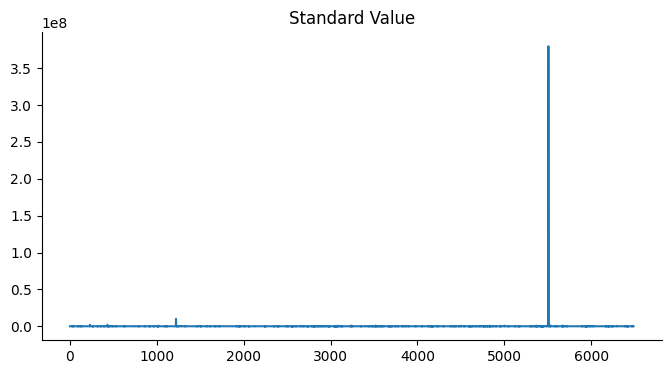

In [35]:
# @title Standard Value

from matplotlib import pyplot as plt
filter_df['Standard Value'].plot(kind='line', figsize=(8, 4), title='Standard Value')
plt.gca().spines[['top', 'right']].set_visible(False)

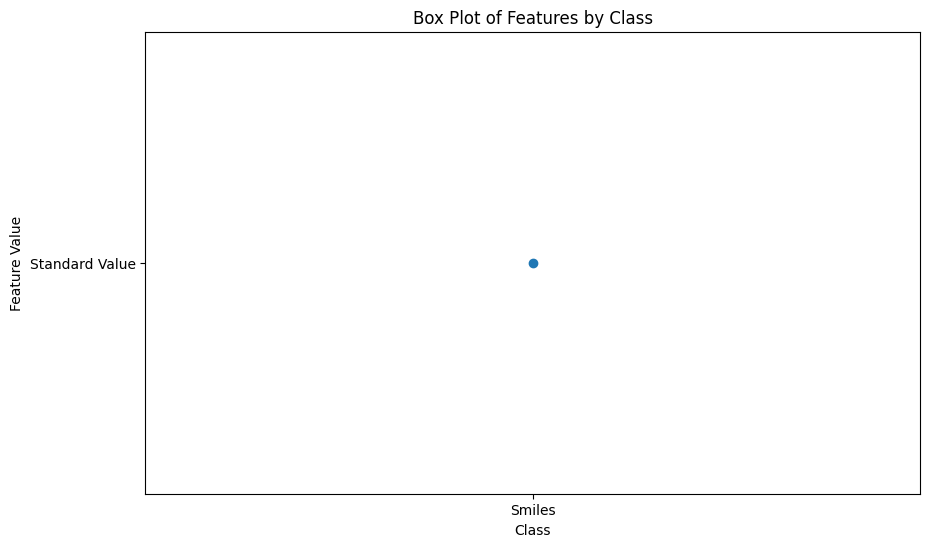

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(['Smiles'],['Standard Value'])
plt.title('Box Plot of Features by Class')
plt.xlabel('Class')
plt.ylabel('Feature Value')
plt.show()

In [36]:
filter_df['Standard Value'].max()

379700000.0

In [100]:
filter_df['Standard Value(M)'] = filter_df['Standard Value'] / 1e9

# Display the updated DataFrame
filter_df

,Smiles,Standard Value,Standard Values (M),Standard Value (M),Standard Value(M)
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,230.0,2.300000e-07,2.300000e-07,2.300000e-07
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,50000.0,5.000000e-05,5.000000e-05,5.000000e-05
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,50000.0,5.000000e-05,5.000000e-05,5.000000e-05
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,35.0,3.500000e-08,3.500000e-08,3.500000e-08
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,13.0,1.300000e-08,1.300000e-08,1.300000e-08
...,...,...,...,...,...
6483,O=C(CCCCCCC(=O)Nc1ccccc1)NO,33.0,3.300000e-08,3.300000e-08,3.300000e-08
6484,O=C(CCCCCCNC(=O)c1cnc(N(c2ccccc2)c2ccccc2)nc1)NO,4.7,4.700000e-09,4.700000e-09,4.700000e-09
6485,CNc1nc(Cl)nc2c1ncn2Cc1ccc(C(=O)Nc2ccccc2N)cc1,21800.0,2.180000e-05,2.180000e-05,2.180000e-05
6486,Cc1cc(C)c(CNC(=O)c2cc(-c3ccc(NC(=O)CCCCCCC(=O)...,180.0,1.800000e-07,1.800000e-07,1.800000e-07


In [96]:
len(filter_df['Standard Value(M)'])

6488

In [99]:
def norm_value(input):
  norm = []
  for i in input['Standard Values (M)']:
    if i > 100000000:
      i = 100000000
      norm.append(i)
    input[filter_df['Standard Value (M)']] = norm
    x = input.drop(columns=['Standard Values (M)'])
    return(x)

standard_value = norm_value(filter_df)
standard_value


ValueError: Columns must be same length as key

ValueError: Length of values (1) does not match length of index (6488)

In [101]:
filter_df['pIC50'] = -np.log10(filter_df['Standard Value(M)'])

print(filter_df)

                                                 Smiles  Standard Value  \
0     CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...           230.0   
1                    O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1         50000.0   
2     C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...         50000.0   
3     Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...            35.0   
4     COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...            13.0   
...                                                 ...             ...   
6483                        O=C(CCCCCCC(=O)Nc1ccccc1)NO            33.0   
6484   O=C(CCCCCCNC(=O)c1cnc(N(c2ccccc2)c2ccccc2)nc1)NO             4.7   
6485      CNc1nc(Cl)nc2c1ncn2Cc1ccc(C(=O)Nc2ccccc2N)cc1         21800.0   
6486  Cc1cc(C)c(CNC(=O)c2cc(-c3ccc(NC(=O)CCCCCCC(=O)...           180.0   
6487  COc1cc(C(=O)c2csc(-c3ccc(C#CCCC(=O)Nc4ccccc4N)...         20230.0   

      Standard Values (M)  Standard Value (M)  Standard Value(M)     pIC50  
0            2.300000e

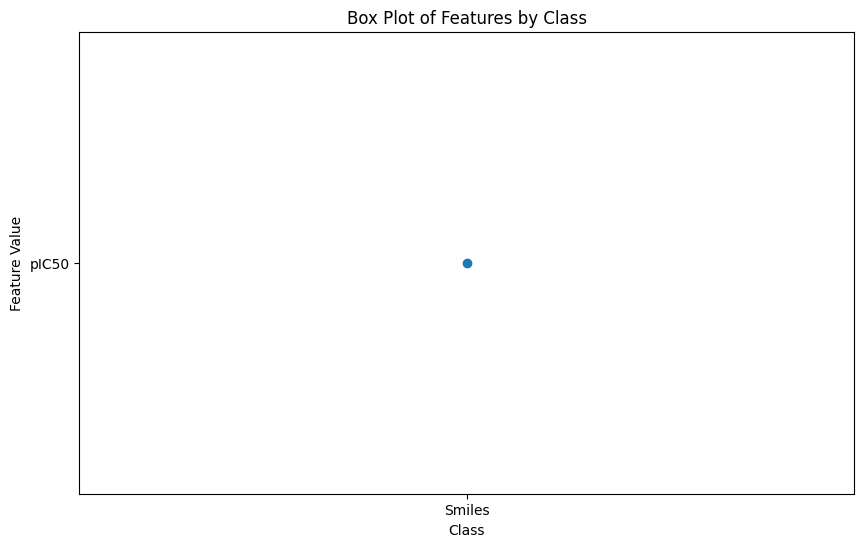

In [102]:
plt.figure(figsize=(10, 6))
plt.scatter(['Smiles'],['pIC50'])
plt.title('Box Plot of Features by Class')
plt.xlabel('Class')
plt.ylabel('Feature Value')
plt.show()

In [104]:
filter_df['pIC50'].max()

11.698970004336019

11.698970004336019

In [105]:
filter_df['pIC50'].max()


11.698970004336019

In [106]:
filter_df['pIC50'].min()

0.4205594028602028

In [152]:
pIC50_threshold=[]

for i in filter_df.pIC50:
  if float(i) >= 8:
      pIC50_threshold.append("Rank I")
  elif float(i) >=6 and float(i)<8:
      pIC50_threshold.append("Rank II")
  else:
      pIC50_threshold.append("Rank III")

In [153]:
count_r1=0
for ele in pIC50_threshold:
  if ele=="Rank III":count_r1+=1

print(count_r1)

2029


In [154]:
pIC50_class = pd.Series(pIC50_threshold, name='pIC50_class')
final_df = pd.concat([filter_df, pIC50_class], axis=1)
final_df.head()

,Smiles,Standard Value,Standard Values (M),Standard Value (M),Standard Value(M),pIC50,pIC50_class
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,230.00,0.00,0.00,0.00,6.64,Rank II
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,50000.00,0.00,0.00,0.00,4.30,Rank III
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,50000.00,0.00,0.00,0.00,4.30,Rank III
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,35.00,0.00,0.00,0.00,7.46,Rank II
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,13.00,0.00,0.00,0.00,7.89,Rank II


In [155]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem, PandasTools
from rdkit.ML.Descriptors import MoleculeDescriptors

In [ ]:
descriptor_names = [desc_name[0] for desc_name in Descriptors._descList] #208, list exists in rdkit, wol wt

calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)

def calculate_descriptors(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles) # converting smiles to "molecular object"
        if mol is not None:
            return calculator.CalcDescriptors(mol)
        else:
            return [None] * len(descriptor_names)
    except:
        return [None] * len(descriptor_names)

descriptors = filter_df['Smiles'].apply(calculate_descriptors) # applying the function to generate descriptors on the SMILES column in our original dataframe
desc = pd.DataFrame(descriptors.tolist(), columns=descriptor_names) # Adding these descriptors to a new data frame, whose column heading is the descriptor name
results_df = pd.concat([final_df, desc], axis=1) # make a final data frame by joing original df and df of chemical desciptors


Streaming output truncated to the last 5000 lines.
[06:08:36] DEPRECATION WARNING: please use MorganGenerator
[06:08:36] DEPRECATION WARNING: please use MorganGenerator
[06:08:36] DEPRECATION WARNING: please use MorganGenerator
[06:08:36] DEPRECATION WARNING: please use MorganGenerator
[06:08:36] DEPRECATION WARNING: please use MorganGenerator
[06:08:36] DEPRECATION WARNING: please use MorganGenerator
[06:08:36] DEPRECATION WARNING: please use MorganGenerator
[06:08:36] DEPRECATION WARNING: please use MorganGenerator
[06:08:36] DEPRECATION WARNING: please use MorganGenerator
[06:08:36] DEPRECATION WARNING: please use MorganGenerator
[06:08:36] DEPRECATION WARNING: please use MorganGenerator
[06:08:36] DEPRECATION WARNING: please use MorganGenerator
[06:08:36] DEPRECATION WARNING: please use MorganGenerator
[06:08:36] DEPRECATION WARNING: please use MorganGenerator
[06:08:36] DEPRECATION WARNING: please use MorganGenerator
[06:08:36] DEPRECATION WARNING: please use MorganGenerator
[06:0

In [ ]:
cleaned_final = results_df.dropna()
print(f"Original DataFrame shape: {results_df.shape}")
print(f"Cleaned DataFrame shape: {cleaned_final.shape}")

In [ ]:
c=0
check=cleaned_final['pIC50_class']
for ele in check:
  if ele=='Rank III': c+=1

print(c)

In [ ]:
cleaned_final.head()

In [ ]:

cleaned_final.shape

In [ ]:
from sklearn.preprocessing import RobustScaler # robust to outliers
df_robust = cleaned_final.copy()

# numeric columns excluding 'solubility' which is our target column for prediction by model
numeric_columns = df_robust.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = [col for col in numeric_columns if col != 'pIC50'] # dont scale y!

scaler = RobustScaler()

# scale selected numeric columns
df_robust[numeric_columns] = scaler.fit_transform(df_robust[numeric_columns])

df_robust.head()

In [ ]:
invalid_count = 0

# Maximum value for float32
float32_threshold = np.finfo(np.float32).max

# Iterate through all rows and columns
rows_to_drop = []

for index, row in df_robust.iterrows():
    for value in row:
        # Check if the value is numeric before applying isinf or comparing thresholds
        if pd.api.types.is_numeric_dtype(type(value)):
            if pd.isnull(value) or np.isinf(value) or abs(value) > float32_threshold:
                rows_to_drop.append(index)
                invalid_count += 1
                break  # Break after marking the row to drop
        else:
            # If it's not numeric, just check for NaN
            if pd.isnull(value):
                rows_to_drop.append(index)
                invalid_count += 1
                break

# Drop rows that contain invalid values
df_robust.drop(rows_to_drop, inplace=True)

# Output the number of invalid entries dropped
print(f"Dropped {invalid_count} invalid entries.")


In [ ]:
y = df_robust['pIC50_class']
X = df_robust.drop(columns=['Smiles', 'pIC50','pIC50_class'])

In [ ]:
print(y.head())
print(X.head())

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the RandomForestClassifier on the entire dataset
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to map features to their importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Extract the top 25 features
selected_features = importance_df.head(25)['Feature'].tolist()

print("Top n features:", selected_features)

In [ ]:
X_selected = pd.DataFrame(X, columns=selected_features)

X_selected.head()

In [ ]:
data=X_selected.copy()
data['bioactivity_class']=y

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
target = 'bioactivity_class'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting the data into features (X) and target (y)
X_train = train_data.drop(columns=[target])
y_train = train_data[target]
X_test = test_data.drop(columns=[target])
y_test = test_data[target]

# Initializing the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=25, random_state=42)

# Fitting the model on the training data
rf_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = rf_classifier.predict(X_test)

y_train_pred=rf_classifier.predict(X_train)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
print("Classification Report:")
print(classification_report(y_train, y_train_pred))

In [ ]:
print("Classification Report:")
print(classification_report(y_train, y_train_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting the data into features (X) and target (y)
X_train = train_data.drop(columns=[target])
y_train = train_data[target]
X_test = test_data.drop(columns=[target])
y_test = test_data[target]

# Initializing the Random Forest Classifier with adjustments
rf_classifier = RandomForestClassifier(
    n_estimators=150,          # Increase number of trees
    max_depth=8,              # Limit maximum depth of trees
    min_samples_split=5,       # Minimum samples to split a node
    min_samples_leaf=3,        # Minimum samples at a leaf node
    random_state=42,
    max_features='sqrt'
)

rf_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optionally, you can also evaluate training predictions
y_train_pred = rf_classifier.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))


In [ ]:
# Print classification report
print("Classification Report:")
print(classification_report(y_train, y_train_pred))

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=5, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")

    # Calculate learning curve
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')

    # Mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
plot_learning_curve(rf_classifier, X_train, y_train)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
lazy_class = LazyClassifier()
train,test = lazy_class.fit(X_train, X_test, y_train, y_test)

# Print the results
print(train)

In [148]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.4 MB/s eta 0:00:00


In [149]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


def objective(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    max_features = trial.suggest_categorical('max_features', ['sqrt','log2',None])

    # Create and evaluate the model
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    score = cross_val_score(model, X_selected, y, n_jobs=-1, cv=3).mean()
    return score

# Create a study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)


[I 2024-09-28 05:59:07,703] A new study created in memory with name: no-name-e020d415-baef-4227-ac5a-f03489381b90
[I 2024-09-28 05:59:21,085] Trial 0 finished with value: 0.9995216836491472 and parameters: {'n_estimators': 264, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 0 with value: 0.9995216836491472.
[I 2024-09-28 05:59:25,903] Trial 1 finished with value: 0.9995216836491472 and parameters: {'n_estimators': 57, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 0 with value: 0.9995216836491472.
[I 2024-09-28 05:59:28,832] Trial 2 finished with value: 0.9995216836491472 and parameters: {'n_estimators': 64, 'max_depth': 27, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 0 with value: 0.9995216836491472.
[I 2024-09-28 05:59:34,911] Trial 3 finished with value: 0.9995216836491472 and parameters: {'n_estimators': 194, 'max_depth': 21, 'min_sa

Best hyperparameters:  {'n_estimators': 183, 'max_depth': 29, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': None}
